# How to collect data from HF repository

The idea is to get familiarize with the HF API to extract data from ML repositories.
Is important to realize that relevant metadata basically can be found in the readme.MD file.

In [1]:
from huggingface_hub import hf_hub_download
from huggingface_hub import ModelCard
from huggingface_hub import HfApi
from huggingface_hub.utils import EntryNotFoundError
import matplotlib.pyplot as plt
import requests
import datetime
from collections import defaultdict

### Download a specific file

In the quickstart guide of the [Hugging Face Hub API](https://huggingface.co/docs/huggingface_hub/v0.8.0/en/quick-start), there is an example on how to retrieve particular documents from the ML repository.  

In [2]:
hf_hub_download(repo_id="google/pegasus-xsum", filename="README.md")

LocalEntryNotFoundError: An error happened while trying to locate the file on the Hub and we cannot find the requested files in the local cache. Please check your connection and try again or make sure your Internet connection is on.

Now, we would like to pick where is the document being downloaded. Even check if we can bring it to memory right away.

For the first problem we have the following [documentation](https://huggingface.co/docs/huggingface_hub/main/en/guides/download). We can use the `local_dir="path/to/folder"` attribute of the `hf_hub_download` function.

### Model cards
Even better than the above, there are ways to only query the Model card metadata that is usually on the README.md file, using the [ModelCard](https://huggingface.co/docs/huggingface_hub/main/en/guides/model-cards) function. 

Now the problem with this approach is clear, not all the metadata can be found on the Model card, a lot of useful information can be extracted from the README.md file.

Even with the previous setback in can said that this functionality really helps to proccess the data better. 

Now I don't know if it is worth to spend one of the 10k limited requests we have every minute on a preprocessing step. 

In [3]:
card = ModelCard.load('google/pegasus-xsum')

#Get the textual part of the README.md file of the model 
print(card.text)

LocalEntryNotFoundError: An error happened while trying to locate the file on the Hub and we cannot find the requested files in the local cache. Please check your connection and try again or make sure your Internet connection is on.

In [9]:
#Get the metadata part of README.md file of the model 
print(card.data)

language: en
tags:
- summarization
model-index:
- name: google/pegasus-xsum
  results:
  - task:
      type: summarization
      name: Summarization
    dataset:
      name: samsum
      type: samsum
      config: samsum
      split: train
    metrics:
    - type: rouge
      value: 21.8096
      name: ROUGE-1
      verified: true
    - type: rouge
      value: 4.2525
      name: ROUGE-2
      verified: true
    - type: rouge
      value: 17.4469
      name: ROUGE-L
      verified: true
    - type: rouge
      value: 18.8907
      name: ROUGE-LSUM
      verified: true
    - type: loss
      value: 3.0317161083221436
      name: loss
      verified: true
    - type: gen_len
      value: 20.3122
      name: gen_len
      verified: true
  - task:
      type: summarization
      name: Summarization
    dataset:
      name: xsum
      type: xsum
      config: default
      split: test
    metrics:
    - type: rouge
      value: 46.8623
      name: ROUGE-1
      verified: true
    - type: ro

` card.data ` : Returns a ModelCardData instance with the model card’s metadata. 
Call `.to_dict()` on this instance to get the representation as a dictionary.

In [10]:
print(card.data.to_dict())

{'language': 'en', 'tags': ['summarization'], 'model-index': [{'name': 'google/pegasus-xsum', 'results': [{'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'config': 'samsum', 'split': 'train'}, 'metrics': [{'type': 'rouge', 'value': 21.8096, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 4.2525, 'name': 'ROUGE-2', 'verified': True}, {'type': 'rouge', 'value': 17.4469, 'name': 'ROUGE-L', 'verified': True}, {'type': 'rouge', 'value': 18.8907, 'name': 'ROUGE-LSUM', 'verified': True}, {'type': 'loss', 'value': 3.0317161083221436, 'name': 'loss', 'verified': True}, {'type': 'gen_len', 'value': 20.3122, 'name': 'gen_len', 'verified': True}]}, {'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'xsum', 'type': 'xsum', 'config': 'default', 'split': 'test'}, 'metrics': [{'type': 'rouge', 'value': 46.8623, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 24.4533, 'name': 'RO

### Model card Format

Information about the **format and fields** of the default template of the structured section of the Metadacard can be found [here](https://github.com/huggingface/huggingface_hub/blob/main/src/huggingface_hub/templates/modelcard_template.md).

- A sample of the format explanation:

    ``` markdown
    ---
    # For reference on model card metadata, see the spec: https://github.com/huggingface/hub-docs/blob/main/modelcard.md?plain=1
    # Doc / guide: https://huggingface.co/docs/hub/model-cards
    {{ card_data }}
    ---

    # Model Card for {{ model_id | default("Model ID", true) }}

    <!-- Provide a quick summary of what the model is/does. -->

    {{ model_summary | default("", true) }}

    ## Model Details

    ### Model Description

    <!-- Provide a longer summary of what this model is. -->

    {{ model_description | default("", true) }}

    - **Developed by:** {{ developers | default("[More Information Needed]", true)}}
    - **Funded by [optional]:** {{ funded_by | default("[More Information Needed]", true)}}
    - **Shared by [optional]:** {{ shared_by | default("[More Information Needed]", true)}}
    - **Model type:** {{ model_type | default("[More Information Needed]", true)}}
    - **Language(s) (NLP):** {{ language | default("[More Information Needed]", true)}}
    - **License:** {{ license | default("[More Information Needed]", true)}}
    - **Finetuned from model [optional]:** {{ base_model | default("[More Information Needed]", true)}}
    ```

- The API provides an easy way to set this fields:

    ``` python
    # Using the Default Template
    card_data = ModelCardData(
        language='en',
        license='mit',
        library_name='timm',
        tags=['image-classification', 'resnet'],
        datasets=['beans'],
        metrics=['accuracy'],
    )
    ```



### List models

Now the next step is how to get the names of the model repositories. After that, it would be nice to figure out a way to get the names of models based on a time period.

Let's explore the [list_models](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/hf_api#huggingface_hub.HfApi.list_models) function.

We can access relevant information of the model by using the properties of the [ModelInfo](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/hf_api#huggingface_hub.hf_api.ModelInfo) Object.

In [4]:
api = HfApi()

# List all models
model_list = api.list_models()

i = 5

for model in model_list:
    if(i==0):
        break
    i-=1
    print(model.id ,model.created_at)

albert/albert-base-v1 2022-03-02 23:29:04+00:00
albert/albert-base-v2 2022-03-02 23:29:04+00:00
albert/albert-large-v1 2022-03-02 23:29:04+00:00
albert/albert-large-v2 2022-03-02 23:29:04+00:00
albert/albert-xlarge-v1 2022-03-02 23:29:04+00:00


#### Order in the lists

After around 30000 of the initial models, different dates start to appear, and they look to be orderd in an accedent pattern.
The initial date appears to be 2022-03-02 23:29:04+00:00, and then another batch with 2022-03-02 23:29:05+00:00 appears as well.
Retreiving the general information from each model seems to be fast.

In [12]:
model_list = api.list_models()
i = 30000
unique_dates = set()
for model in model_list:
    if(i==0):
        break
    i-=1
    unique_dates.add(model.created_at)

print(unique_dates)
print(len(unique_dates))

{datetime.datetime(2022, 3, 2, 23, 29, 4, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 3, 2, 23, 29, 5, tzinfo=datetime.timezone.utc)}
2


In [13]:
model_list = api.list_models()
i = 31000
unique_dates = set()
for model in model_list:
    if(i==0):
        break
    i-=1
    unique_dates.add(model.created_at)

print(len(unique_dates))
last_10_dates = list(unique_dates)[-10:]
print([str(x) for x in last_10_dates])

902
['2022-03-09 11:52:08+00:00', '2022-03-09 13:30:22+00:00', '2022-03-03 15:53:14+00:00', '2022-03-04 12:49:07+00:00', '2022-03-07 00:22:21+00:00', '2022-03-08 14:22:06+00:00', '2022-03-03 04:53:15+00:00', '2022-03-06 20:35:13+00:00', '2022-03-05 20:52:57+00:00', '2022-03-07 09:51:17+00:00']


### Combine the methods

We can apply the knowledge of the model cards to the list of model information we got in the last section.

The [`ModelInfo`](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/hf_api#huggingface_hub.hf_api.ModelInfo) object returned by [`list_models()`](https://huggingface.co/docs/huggingface_hub/v0.5.1/en/package_reference/hf_api#huggingface_hub.HfApi.list_models) has the following restrictions:

    Most attributes of this class are optional. This is because the data returned by the Hub depends on the query made. In general, the more specific the query, the more information is returned. On the contrary, when listing models using list_models() only a subset of the attributes are returned.

The above means that, the data from the model card is not brought when the `list_models()` method is called.

In [14]:
model_list = api.list_models()
i = 3
found_metadata_list = []

for model in model_list:
    if(i==0):
        break
    if(model.card_data!=None):
        found_metadata_list.append(model)
        print(model.id)
        print(model.card_data)
        i-=1

The solution is to use the ModelCard.load() function to bring the metadata information.
Here an error occurs where, if the model does not have a model card, the function throws the following:
```cmd
    EntryNotFoundError: 404 Client Error. (Request ID: Root=1-65bab81f-55f2b8de5181a4be4982085b;0edd9b55-c840-4d40-a05e-d03930f3addf)

    Entry Not Found for url: https://huggingface.co/zhuqing/bert-base-uncased-mumsnet-all-0/resolve/main/README.md.
```

You need to import the error from the HF utils libraries and handle it.

In [15]:
model_list = api.list_models()
i = 3
start = 30000
found_metadata_list = []

for model in model_list:
    if(start>0):
        start-=1
        continue
    
    if(i==0):
        break
    
    model_card_data = None
    try:
        model_card_data = ModelCard.load(model.id)
    except EntryNotFoundError:
        print(f"Error loading model card, no model card found for {model.id}")
    
    if(model_card_data!=None):
        print()
        print(model.id)
        print(card.data.to_dict())
        i-=1

Error loading model card, no model card found for zhuqing/bert-base-uncased-netmums-parent
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-business-v2
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-business
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-lib-v2
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-lib
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme1-6000
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme1
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme2-6000
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme2
Error loading model card, no model card found for zhuqing/bert-large-whole-uncased-exp2-feminist
Error loading model card, no model card found for zhuqing/bert-large-whole-uncased-exp2-parent
Error loadi

/home/vscode/.local/lib/python3.11/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")



ziedsb19/tunbert_zied
{'language': 'en', 'tags': ['summarization'], 'model-index': [{'name': 'google/pegasus-xsum', 'results': [{'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'config': 'samsum', 'split': 'train'}, 'metrics': [{'type': 'rouge', 'value': 21.8096, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 4.2525, 'name': 'ROUGE-2', 'verified': True}, {'type': 'rouge', 'value': 17.4469, 'name': 'ROUGE-L', 'verified': True}, {'type': 'rouge', 'value': 18.8907, 'name': 'ROUGE-LSUM', 'verified': True}, {'type': 'loss', 'value': 3.0317161083221436, 'name': 'loss', 'verified': True}, {'type': 'gen_len', 'value': 20.3122, 'name': 'gen_len', 'verified': True}]}, {'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'xsum', 'type': 'xsum', 'config': 'default', 'split': 'test'}, 'metrics': [{'type': 'rouge', 'value': 46.8623, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value

### Faster downloads
If you are running on a machine with high bandwidth, you can increase your download speed with [hf_transfer](https://github.com/huggingface/hf_transfer), a Rust-based library developed to speed up file transfers with the Hub. To enable it:

- Specify the hf_transfer extra when installing huggingface_hub (e.g. pip install huggingface_hub[hf_transfer]).
- Set HF_HUB_ENABLE_HF_TRANSFER=1 as an environment variable.

Test will have to be made to actually determine how worth it it is to use this feature, given that the README.md files weight between 3KB to 10KB.

# Hugging Face Platform user usage.

## Models creation curve

The idea is to visualize the growth curve of models creation in the Hugging Face platform.

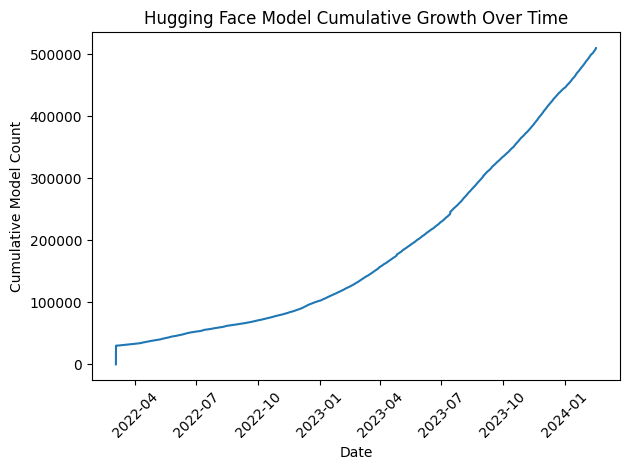

In [16]:
api = HfApi()
model_list = api.list_models()
i = 1000000
start = 0
dates = []
counts = []

for model in model_list:
  if start > 0:
    start -= 1
    continue
  
  if i == 0:
    break

  date = model.created_at
  dates.append(date)

  i -= 1
  counts.append(len(dates))

plt.plot(dates, counts)
plt.xlabel('Date')
plt.ylabel('Cumulative Model Count')
plt.title('Hugging Face Model Cumulative Growth Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

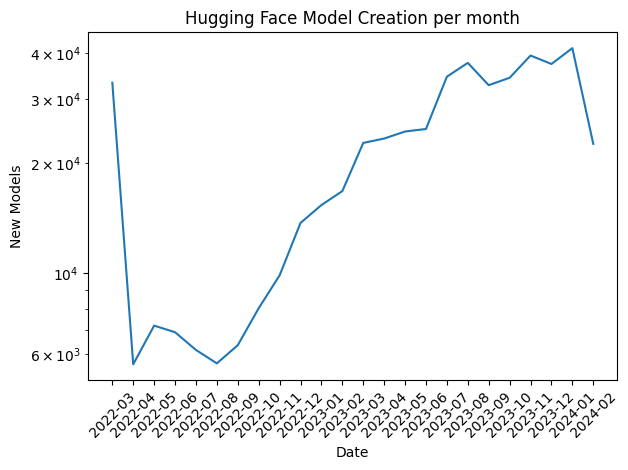

In [17]:
api = HfApi()
model_list = api.list_models()
i = 1000000
start = 0

dates = []
daily_counts_dict = defaultdict(int)

for model in model_list:
  if start > 0:
    start -= 1
    continue
  
  if i == 0:
    break

  date = model.created_at
  daily_counts_dict[date.strftime("%Y-%m")] += 1 # Add 1 for each model
  i-=1
  
dates = []
daily_counts_list = []
for date, count in daily_counts_dict.items():
  dates.append(date)
  daily_counts_list.append(count)
  
plt.plot(dates, daily_counts_list)
plt.xlabel('Date')
plt.ylabel('New Models') 
plt.title('Hugging Face Model Creation per month')
plt.xticks(rotation=45)

plt.yscale('log')

plt.tight_layout()
plt.show()

## Models being updated

The idea is to visualize how many models are being updated.

In the following graph will see how many models were last updated per month.

The first thing that changes from the previous graph is that we are using the `full = True` parameter in the [`api.list_models()`](https://huggingface.co/docs/huggingface_hub/v0.5.1/en/package_reference/hf_api#huggingface_hub.HfApi.list_models) function, that parameter allows us to bring more information about the models, including the last update date and other files that are not that light.

The second thing that changes is that we are using the `limit` parameter to bring X amount of models at a time.

While trying to use the ```api.list_models(limit=250000, full = True)```python function we found a problem with the amount of data a request can bring. 

```cmd
    IncompleteRead: IncompleteRead(15015817 bytes read, 278169 more expected)
```

In [18]:
api = HfApi()
i = 2000 
model_list = list(api.list_models(limit=i,full=True))
start = 0

dates = []
daily_counts_dict = defaultdict(int)
number_of_models_not_modified = 0

for model in model_list:
  if start > 0:
    start -= 1
    continue
  
  if i == 0:
    break

  date_created = model.created_at
  date_modified = model.last_modified
  if date_modified != None and date_modified!= date_created:
    daily_counts_dict[date_modified.strftime("%Y-%m")] += 1 # Add 1 for each model
  else:
    number_of_models_not_modified += 1
  
  i-=1
  
dates = []
daily_counts_list = []
sorted_daily_counts_dict = sorted(daily_counts_dict.items(), key=lambda x: x[0])

for date, count in sorted_daily_counts_dict:
  dates.append(date)
  daily_counts_list.append(count)

0


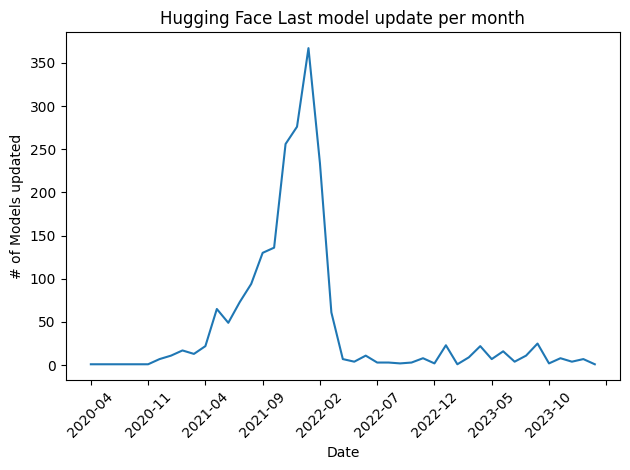

In [19]:
import matplotlib.ticker as mtick

print(number_of_models_not_modified)
plt.plot(dates, daily_counts_list)
plt.xlabel('Date')
plt.ylabel('# of Models updated') 
plt.title('Hugging Face Last model update per month')
plt.xticks(rotation=45)
ax = plt.gca()  
ax.xaxis.set_major_locator(mtick.MultipleLocator(5))

# plt.yscale('log')

plt.tight_layout()
plt.show()

The problem with the above graph is that the models that are brought are ordered based in the creation time in acending order and the limit on the amount of models that can be brougt because of the `full = true` parameter. When using the `full=true` parameter a lot of files about the model are brought and that makes the errors that we have seen before appear.

Now the trick is to use a filter to bring batches of models based on the last modified date, and for that we can use the `sort="last_modified"` parameter and the `direction=1` parameter to control the order of the requests. When we use the `sort="last_modified"` parameter the objects in the response will also include the last modified date of the model without the need of bringing all the other unnecessary files.

In [20]:
i = 250000

model_list_back = []
model_list_back = list(api.list_models(limit=i,sort="last_modified",direction=1))
model_list_front = list(api.list_models(limit=i,sort="last_modified",direction=-1))

model_list = model_list_back + model_list_front

dates = []
daily_counts_dict = defaultdict(int)
number_of_models_not_modified = 0

for model in model_list:

  date_created = model.created_at
  date_modified = model.last_modified
  if date_modified != None and date_modified!= date_created:
    daily_counts_dict[date_modified.strftime("%Y-%m")] += 1 # Add 1 for each model
  else:
    number_of_models_not_modified += 1
  
  i-=1
  
dates = []
daily_counts_list = []
sorted_daily_counts_dict = sorted(daily_counts_dict.items(), key=lambda x: x[0])

for date, count in sorted_daily_counts_dict:
  dates.append(date)
  daily_counts_list.append(count)

# of models not modified:  80151


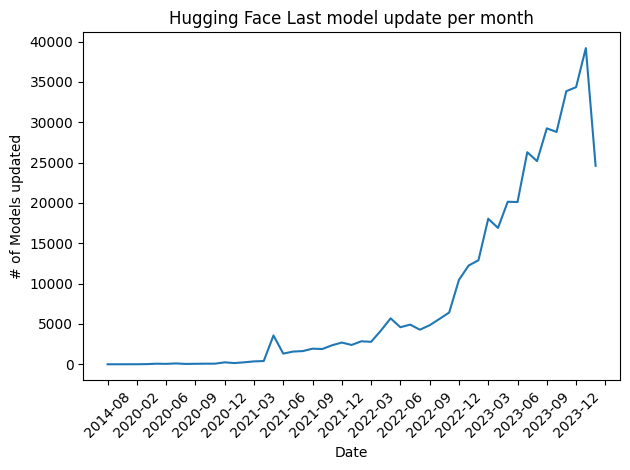

In [21]:
import matplotlib.ticker as mtick

print("# of models not modified: ", number_of_models_not_modified)
plt.plot(dates, daily_counts_list)
plt.xlabel('Date')
plt.ylabel('# of Models updated') 
plt.title('Hugging Face Last model update per month')
plt.xticks(rotation=45)
ax = plt.gca()  
ax.xaxis.set_major_locator(mtick.MultipleLocator(3))

# plt.yscale('log')

plt.tight_layout()
plt.show()

## Check the last modified dates on files 

Accessing metadata about file creation or modification dates is not supported on the HF platform as of the 2/16/2024.

This slows down the identification of models that need to update their metadata. But we can identify models that were modified during the waiting period.

Now we need to figure out a way to not process old metadata files, there are two options:
- Store the metadata files of all models in the HF platform and compare them before starting any of the processing. This solution implies an agregated cost for storage in the infrastructure. The calculation on the amount of storage needed has been done before in the [TDD file](https://docs.google.com/document/d/1aczsHqJ5xxc9Gdd9wC_sfutz1yVUgNJ7WttuSl3SsXU/edit?usp=sharing) of the project and amounts to about 10GB.

- Process the metadata and check that the information is not repeated in the database. This option implies a cost for the processing of the metadata, and slowing down the process of the models that need to update their metadata. To be fare low latency is not required, but we don't want to make the process slower if it is not necessary.

# Getting models data in chronological order
Now, with everything that we have researched so far, let's put it all together.

In [27]:
model_retreival_limit = 500
model_list = list(api.list_models(limit=model_retreival_limit,sort="last_modified",direction=-1))

cnt_models_to_process = 3
found_metadata_list = []

for model in model_list:
    
    if(cnt_models_to_process==0):
        break
    
    model_card_data = None
    try:
        model_card_data = ModelCard.load(model.id)
    except EntryNotFoundError:
        print(f"Error loading model card, no model card found for {model.id}")
    
    if(model_card_data!=None):
        print("\n##############################################")
        print(model.last_modified)
        print(model.id)
        print(card.data.to_dict())
        print("\n##############################################")
        
        cnt_models_to_process-=1

Error loading model card, no model card found for Likz/image_classification
Error loading model card, no model card found for RafiAzkarnaen/image_classification
Error loading model card, no model card found for hananeChab/opus-mt-ar-en_fine_tuned


README.md: 100%|██████████| 4.69k/4.69k [00:00<00:00, 11.4MB/s]



##############################################
2024-02-16 16:28:37+00:00
hgfsdvhbdxfc/Dem-Donors-GOP-Billionaires-Wall-Street-Execs-Heres-Who-New-Filings-Show-Gave-To-Nik-fh-updated
{'language': 'en', 'tags': ['summarization'], 'model-index': [{'name': 'google/pegasus-xsum', 'results': [{'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'config': 'samsum', 'split': 'train'}, 'metrics': [{'type': 'rouge', 'value': 21.8096, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 4.2525, 'name': 'ROUGE-2', 'verified': True}, {'type': 'rouge', 'value': 17.4469, 'name': 'ROUGE-L', 'verified': True}, {'type': 'rouge', 'value': 18.8907, 'name': 'ROUGE-LSUM', 'verified': True}, {'type': 'loss', 'value': 3.0317161083221436, 'name': 'loss', 'verified': True}, {'type': 'gen_len', 'value': 20.3122, 'name': 'gen_len', 'verified': True}]}, {'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'xsum', 'type

README.md: 100%|██████████| 3.50k/3.50k [00:00<00:00, 12.0MB/s]



##############################################
2024-02-16 16:28:36+00:00
gbsdfcvbwx/MILOSI-Security-Norman-Man-To-Serve-Nearly-5-Years-in-Federal-Prison-for-Lying-af-updated
{'language': 'en', 'tags': ['summarization'], 'model-index': [{'name': 'google/pegasus-xsum', 'results': [{'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'config': 'samsum', 'split': 'train'}, 'metrics': [{'type': 'rouge', 'value': 21.8096, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 4.2525, 'name': 'ROUGE-2', 'verified': True}, {'type': 'rouge', 'value': 17.4469, 'name': 'ROUGE-L', 'verified': True}, {'type': 'rouge', 'value': 18.8907, 'name': 'ROUGE-LSUM', 'verified': True}, {'type': 'loss', 'value': 3.0317161083221436, 'name': 'loss', 'verified': True}, {'type': 'gen_len', 'value': 20.3122, 'name': 'gen_len', 'verified': True}]}, {'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'xsum', 'type': 'xsum

README.md: 100%|██████████| 5.18k/5.18k [00:00<00:00, 7.09MB/s]


##############################################
2024-02-16 16:28:26+00:00
DhimanBose/Bangla_Masked_Language_Model_lite
{'language': 'en', 'tags': ['summarization'], 'model-index': [{'name': 'google/pegasus-xsum', 'results': [{'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'config': 'samsum', 'split': 'train'}, 'metrics': [{'type': 'rouge', 'value': 21.8096, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 4.2525, 'name': 'ROUGE-2', 'verified': True}, {'type': 'rouge', 'value': 17.4469, 'name': 'ROUGE-L', 'verified': True}, {'type': 'rouge', 'value': 18.8907, 'name': 'ROUGE-LSUM', 'verified': True}, {'type': 'loss', 'value': 3.0317161083221436, 'name': 'loss', 'verified': True}, {'type': 'gen_len', 'value': 20.3122, 'name': 'gen_len', 'verified': True}]}, {'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'xsum', 'type': 'xsum', 'config': 'default', 'split': 'test'}, 'metrics': [{'

## Get the number of downloads of a model

You can query their API directly by using the following link format
```
https://huggingface.co/api/models/openai/clip-vit-large-patch14?expand[]=downloads&expand[]=downloadsAllTime
```

In [2]:
def http_request_to_dict(url):
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for non-2xx status codes

        # Handle various response content types
        if response.headers.get('Content-Type', '').startswith('application/json'):
            return response.json()  # Parse as JSON

        # Handle other content types or return raw content if parsing fails
        return response.text

    except requests.exceptions.RequestException as e:
        print(f"Error making HTTP request: {e}")
        return None
try:
    response_dict = http_request_to_dict("https://huggingface.co/api/models/openai/clip-vit-large-patch14?expand[]=downloads&expand[]=downloadsAllTime")
    if response_dict:
        print("Successfully retrieved data:")
        print(response_dict)
    else:
        print("Failed to retrieve data.")
except Exception as e:  # Catch generic exceptions for overall error reporting
    print(f"An unexpected error occurred: {e}")

Successfully retrieved data:
{'_id': '621ffdc136468d709f17ea63', 'id': 'openai/clip-vit-large-patch14', 'downloads': 69495577, 'downloadsAllTime': 355828766}


In [8]:
model_retreival_limit = 500
model_list = list(api.list_models(limit=model_retreival_limit,sort="last_modified",direction=-1))

cnt_models_to_process = 3
found_metadata_list = []

for model in model_list:
    
    if(cnt_models_to_process==0):
        break
    
    response_dict = None
    try:
        model_id_split = model.id.split("/")
        user_tag = model_id_split[0]
        model_name = model_id_split[1]
        query_downloads_url = f"https://huggingface.co/api/models/{user_tag}/{model_name}?expand[]=downloads&expand[]=downloadsAllTime" 
        response_dict = http_request_to_dict(query_downloads_url)
    except EntryNotFoundError:
        print(f"No model card found for {model.id}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    
    if(response_dict!=None):
        print("\n##############################################")
        print(user_tag)
        print(model_name)
        print(response_dict)
        print("\n##############################################")
        
        cnt_models_to_process-=1


##############################################
ChrisWilson011016
5Gn2NzeZY49P8iwkYYj8U53D8w2vePumPwHDFvw5H7WpTjSv_vgg
{'_id': '65da05956bd4865bb673d198', 'id': 'ChrisWilson011016/5Gn2NzeZY49P8iwkYYj8U53D8w2vePumPwHDFvw5H7WpTjSv_vgg', 'downloads': 0, 'downloadsAllTime': 0}

##############################################

##############################################
PassionTeam
5ESCHnzbj9N4UZYsuXWppCbSUGZCqS5ZqtPTuxYCEQEuf1dX_vgg
{'_id': '65db36826d290f6b9038a8f7', 'id': 'PassionTeam/5ESCHnzbj9N4UZYsuXWppCbSUGZCqS5ZqtPTuxYCEQEuf1dX_vgg', 'downloads': 0, 'downloadsAllTime': 0}

##############################################

##############################################
ChrisWilson011016
5CAUJQcv9sYMqXwDE2rQuazZk1NwkLoGSknPBfvMUjocySY7_vgg
{'_id': '65da056c2a6348b0528444e1', 'id': 'ChrisWilson011016/5CAUJQcv9sYMqXwDE2rQuazZk1NwkLoGSknPBfvMUjocySY7_vgg', 'downloads': 0, 'downloadsAllTime': 0}

##############################################
